In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import json
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

logdir = Path("/bigdata/cifar10/logs/rn18/dbs/")

In [36]:
import os

folders = os.listdir(logdir)
print(f"number of folders: {len(folders)}")

number of folders: 6


In [37]:
from tddl.post_processing.path_utils import logdir_to_paths

paths = logdir_to_paths(logdir)

print(len(paths))

4


In [38]:
# baseline

baseline_path = Path("/bigdata/cifar10/logs/baselines/1646668631/rn18_18_dNone_128_adam_l0.001_g0.1_w0.0_sTrue")
# baseline_model = torch.load(baseline_path / "cnn_best.pth")
with open(baseline_path/'results.json') as json_file:
    baseline_result = json.load(json_file)
baseline_result

{'best_epoch': 229,
 'best_train_acc': 0.9999333333333333,
 'best_valid_acc': 0.9216,
 'best_valid_loss': 0.005079200401902199,
 'test_acc': 0.9137,
 'test_loss': 0.005285387974977494,
 'n_param': 11173962,
 'model_name': 'rn18_18_dNone_128_adam_l0.001_g0.1_w0.0_sTrue'}

In [39]:
from tddl.post_processing.post_dbs import process_factorized_networks

process_factorized_networks(paths, baseline_path)

In [40]:
from tddl.post_processing.path_utils import paths_to_df

df = paths_to_df(paths, filename='results_dbs.json', dbs=True)
df['compression'] = 'dbs'
df

,name,nr,layers,factorization,rank,valid_acc,valid_acc_before_ft,test_acc_before_ft,n_param_fact,test_acc,lr,optimizer,baseline_parameters,fact_parameters,compression_ratio,compression
0,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.9,0.9172,0.9004,0.8936,10064253,0.9111,0.00001,adam,11173962,10064253,0.900688,dbs
1,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.75,0.9176,0.8998,0.8929,8407946,0.9111,0.00001,adam,11173962,8407946,0.752459,dbs
2,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.25,0.9082,0.8708,0.8685,2759719,0.9038,0.00001,adam,11173962,2759719,0.246978,dbs
3,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.5,0.9150,0.8934,0.8865,5561778,0.9099,0.00001,adam,11173962,5561778,0.497744,dbs


In [41]:
logdir_constant = Path("/bigdata/cifar10/logs/garipov/constant/")
folders_constant = os.listdir(logdir_constant)
paths_constant = logdir_to_paths(logdir_constant)

process_factorized_networks(paths_constant, baseline_path)

df_constant = paths_to_df(paths_constant, filename='results_dbs.json', dbs=True)
df_constant['compression'] = 'constant'
df_constant

,name,nr,layers,factorization,rank,valid_acc,valid_acc_before_ft,test_acc_before_ft,n_param_fact,test_acc,lr,optimizer,baseline_parameters,fact_parameters,compression_ratio,compression
0,[],[],"[2, 4, 6, 8, 10]",tucker,0.75,0.8984,0.8930,0.8808,422027,0.8873,0.0001,sgd,11173962,422027,0.037769,constant
1,[],[],"[2, 4, 6, 8, 10]",tucker,0.25,0.8694,0.7736,0.7626,141971,0.8665,0.0001,sgd,11173962,141971,0.012706,constant
2,[],[],"[2, 4, 6, 8, 10]",tucker,0.10,0.8138,0.3284,0.3196,60509,0.8050,0.0001,sgd,11173962,60509,0.005415,constant
3,[],[],"[2, 4, 6, 8, 10]",tucker,0.50,0.8882,0.8676,0.8573,279154,0.8831,0.0001,sgd,11173962,279154,0.024983,constant
4,[],[],"[2, 4, 6, 8, 10]",tucker,0.90,0.9036,0.8982,0.8861,501708,0.8891,0.0001,sgd,11173962,501708,0.044900,constant


In [42]:
df = df.append(df_constant, ignore_index=True)
df

,name,nr,layers,factorization,rank,valid_acc,valid_acc_before_ft,test_acc_before_ft,n_param_fact,test_acc,lr,optimizer,baseline_parameters,fact_parameters,compression_ratio,compression
0,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.9,0.9172,0.9004,0.8936,10064253,0.9111,0.00001,adam,11173962,10064253,0.900688,dbs
1,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.75,0.9176,0.8998,0.8929,8407946,0.9111,0.00001,adam,11173962,8407946,0.752459,dbs
2,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.25,0.9082,0.8708,0.8685,2759719,0.9038,0.00001,adam,11173962,2759719,0.246978,dbs
3,[],[],"[6, 9, 12, 15, 19, 22, 25, 28, 31, 35, 38, 41,...",tucker,0.5,0.9150,0.8934,0.8865,5561778,0.9099,0.00001,adam,11173962,5561778,0.497744,dbs
4,[],[],"[2, 4, 6, 8, 10]",tucker,0.75,0.8984,0.8930,0.8808,422027,0.8873,0.00010,sgd,11173962,422027,0.037769,constant
5,[],[],"[2, 4, 6, 8, 10]",tucker,0.25,0.8694,0.7736,0.7626,141971,0.8665,0.00010,sgd,11173962,141971,0.012706,constant
6,[],[],"[2, 4, 6, 8, 10]",tucker,0.1,0.8138,0.3284,0.3196,60509,0.8050,0.00010,sgd,11173962,60509,0.005415,constant
7,[],[],"[2, 4, 6, 8, 10]",tucker,0.5,0.8882,0.8676,0.8573,279154,0.8831,0.00010,sgd,11173962,279154,0.024983,constant
8,[],[],"[2, 4, 6, 8, 10]",tucker,0.9,0.9036,0.8982,0.8861,501708,0.8891,0.00010,sgd,11173962,501708,0.044900,constant


In [43]:
df['rank'] = df['rank'].astype(float, copy=False)
# df['fact_rank'] = df['factorization'] + '-' + df['rank'].apply(str)
# df['fact_layers'] = df['factorization'] + '-' + df['layers'].apply(str)
# df['layers_fact'] = df['layers'].apply(str) + '-' + df['factorization'] 
# df.head()

In [44]:
df['test_error_before_ft'] = 1 - df.test_acc_before_ft
df['test_error'] = 1 - df.test_acc
df['valid_error_before_ft'] = 1 - df.valid_acc_before_ft
df['valid_error'] = 1 - df.valid_acc

df['log_test_error_before_ft'] = np.log(df.test_error_before_ft)
df['log_test_error'] = np.log(df.test_error)
df['log_valid_error_before_ft'] = np.log(df.valid_error_before_ft)
df['log_valid_error'] = np.log(df.valid_error)

In [45]:
# df = df.astype({
#     'layers':"category",
#     'fact_layers':"category",
#     'layers_fact':"category",
# })

# plots

In [46]:
import seaborn as sns
sns.set_theme()

In [47]:
df.columns

Index(['name', 'nr', 'layers', 'factorization', 'rank', 'valid_acc',
       'valid_acc_before_ft', 'test_acc_before_ft', 'n_param_fact', 'test_acc',
       'lr', 'optimizer', 'baseline_parameters', 'fact_parameters',
       'compression_ratio', 'compression', 'test_error_before_ft',
       'test_error', 'valid_error_before_ft', 'valid_error',
       'log_test_error_before_ft', 'log_test_error',
       'log_valid_error_before_ft', 'log_valid_error'],
      dtype='object')

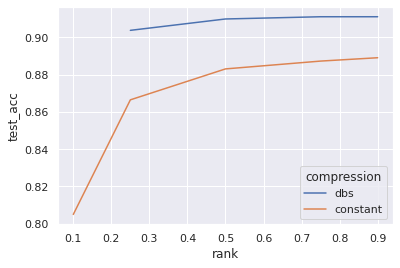

In [48]:
f = sns.lineplot(data=df, x='rank', y='test_acc', hue='compression')
f.get_figure().savefig('../../plots/rn18_c10_dbs_after_ft.pdf')

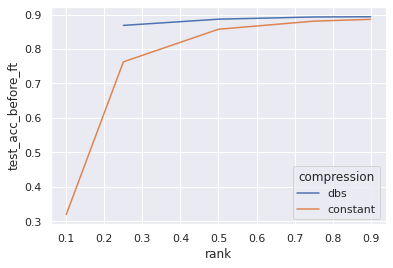

In [49]:
f = sns.lineplot(data=df, x='rank', y='test_acc_before_ft', hue='compression')
f.get_figure().savefig('../../plots/rn18_c10_dbs_before_ft.pdf')